## Visualization of Optimal hyperplane using cvxopt library

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from cvxopt import solvers  # quadratic solvers
from cvxopt import matrix

In [10]:
X = np.array([[0,0], [0, 1], [1, 0], [1, 1], [2, 0], [0, 2]]) # data points

X_ex = np.hstack((np.ones((X.shape[0], 1)), X))   # reshapes [5,2] point to [1, 5, 2]
print(X_ex.shape)

numfeatures = 2

y = np.array([-1, -1, -1, 1, 1, 1]) # Class labels

y = np.reshape(y, (y.shape[0], 1))

(6, 3)


### Define Ghpq

In [11]:
# convert all data to matrix object

inequality_constraint = matrix(y * -X_ex, tc='d')
rhs_inequality_constraint = matrix(-np.ones((X.shape[0], 1)), tc='d')
quadratic_part = matrix(np.identity(numfeatures + 1), tc='d')
linear_part = matrix(np.zeros(numfeatures + 1), tc='d')

In [12]:
sol = solvers.qp(quadratic_part, linear_part, inequality_constraint, rhs_inequality_constraint) # quadratic solver function with parameters

     pcost       dcost       gap    pres   dres
 0:  5.6250e-01  3.1042e+00  4e+00  2e+00  2e-15
 1:  1.4693e+00  5.1033e+00  3e-01  6e-01  5e-16
 2:  9.2454e+00  7.7766e+00  1e+00  3e-16  8e-14
 3:  8.5076e+00  8.4879e+00  2e-02  2e-16  2e-14
 4:  8.5001e+00  8.4999e+00  2e-04  3e-16  2e-14
 5:  8.5000e+00  8.5000e+00  2e-06  3e-16  1e-14
Optimal solution found.


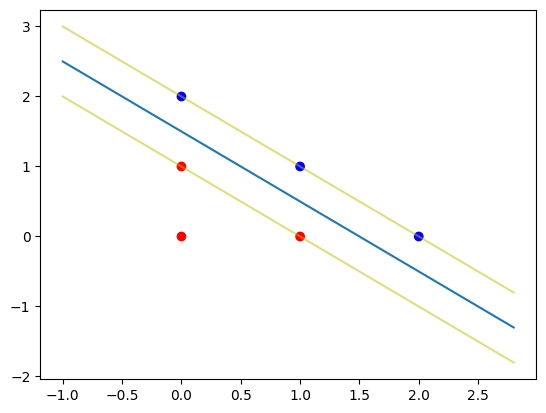

In [13]:
theta = np.array(sol['x'])

# decision boundaries and margins
_x = np.arange(-1, 3, 0.2)
_y = - (_x * theta[1] + theta[0])/theta[2]
_yp = (1 - _x * theta[1] - theta[0])/theta[2]
_yn = (-1 - _x * theta[1] - theta[0])/theta[2]

plt.scatter(X[:, 0], X[:, 1], c=['r' if _y < 1 else 'b' for _y in y])
plt.plot(_x, _y)
plt.plot(_x, _yn, c='y', alpha=0.5)
plt.plot(_x, _yp, c='y', alpha=0.5)

## SVM with slack variable from scratch

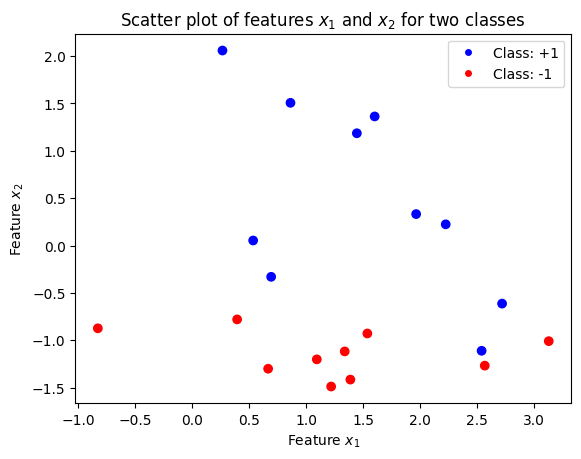

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=20, n_features=2, n_redundant=0, n_repeated=0,
                          n_classes=2, n_clusters_per_class=1, random_state=25, weights=[0.5,0.5], class_sep=1)

y = y * 2 - 1

scatter = plt.scatter(X[:, 0], X[:, 1], c=['r' if _y < 0 else 'b' for _y in y])
plt.title("Scatter plot of features $x_1$ and $x_2$ for two classes")
plt.ylabel("Feature $x_2$")
plt.xlabel("Feature $x_1$")

lp = Line2D(range(2), range(1), color="white", marker='o', markerfacecolor="blue")
ln = Line2D(range(2), range(1), color="white", marker='o', markerfacecolor="red")

plt.legend(handles=(lp, ln), labels=("Class: +1", "Class: -1"))

In [36]:
def train_svm(Xin, yin, C, gamma, lr=0.01):
    np.random.seed(17)

    theta = np.random.randn(Xin.shape[1])
    b = np.random.rand()

    N = Xin.shape[0]
    learning_rate = 0.01


    epochs = 1000
    for epoch in range(epochs):
        dtheta = np.zeros_like(theta)
        db = 0
        for i in range(N):
            pred =  np.dot(theta.T, Xin[i]) + b
            if (yin[i] * pred) < 1:
                dtheta = dtheta = dtheta - yin[i] * Xin[i]
                db = db - yin[i]

        dtheta =  C * dtheta + 2 * gamma * theta
        db = C * db

        theta = theta - learning_rate * dtheta
        b = b - learning_rate * db

    return theta, b
def plot_hyperplane(Xin, yin, theta, b):
    plt.scatter(Xin[:, 0], Xin[:, 1], c=['r' if _y < 0 else 'b' for _y in yin])
    xmin, xmax = -5, 5
    ymin, ymax = -5, 5
    npoints = 500

    _xm = np.linspace(xmin, xmax, npoints)
    _ym = np.linspace(ymin, ymax, npoints)

    color_margin = '#3385ff'

    Xs, Ys = [], []
    colors = []

    for _x in _xm:
        for _y in _ym:
            v = np.dot(theta.T, np.array([[_x], [_y]])) + b
            if v >= -1 and v <= 1:
                Xs.append(_x)
                Ys.append(_y)
                colors.append(color_margin)

    plt.scatter(Xs, Ys, c=colors, alpha=0.3)
    plt.axis([xmin, xmax, ymin, ymax])

    _x = np.linspace(xmin, xmax, npoints)
    _y = - (_x * theta[0] + b)/theta[1] # y for every _x from optimal hyperplane

    _yp = (1 - _x * theta[0] - b)/theta[1] # hyperplane at the positive side

    _yn = (-1 - _x * theta[0] - b)/theta[1] # hyperplane at the negative side

    plt.scatter(Xin[:, 0], Xin[:, 1], c=['r' if _y < 1 else 'b' for _y in yin])
    plt.plot(_x, _y, c='r')
    plt.plot(_x, _yn, c='y', alpha=0.8)
    plt.plot(_x, _yp, c='y', alpha=0.8)

In [39]:
def plot_hyperplane(Xin, yin, theta, b):
    plt.scatter(Xin[:, 0], Xin[:, 1], c=['r' if _y < 0 else 'b' for _y in y])
    xmin, xmax = -5, 5
    ymin, ymax = -5, 5
    npoints = 500

    _xm = np.linspace(xmin, xmax, npoints)
    _ym = np.linspace(ymin, ymax, npoints)

    color_margin = '#3385ff'

    Xs, Ys = [], []
    colors = []

    for _x in _xm:
        for _y in _ym:
            v = np.dot(theta.T, np.array([[_x], [_y]])) + b
            if v >= -1 and v <= 1:
                Xs.append(_x)
                Ys.append(_y)
                colors.append(color_margin)

    plt.scatter(Xs, Ys, c=colors, alpha=0.3)
    plt.axis([xmin, xmax, ymin, ymax])

    _x = np.linspace(xmin, xmax, npoints)
    _y = - (_x * theta[0] + b)/theta[1] # y for every _x from optimal hyperplane

    _yp = (1 - _x * theta[0] - b)/theta[1] # hyperplane at the positive side

    _yn = (-1 - _x * theta[0] - b)/theta[1] # hyperplane at the negative side

    plt.scatter(X[:, 0], X[:, 1], c=['r' if _y < 1 else 'b' for _y in y])
    plt.plot(_x, _y, c='r')
    plt.plot(_x, _yn, c='y', alpha=0.8)
    plt.plot(_x, _yp, c='y', alpha=0.8)

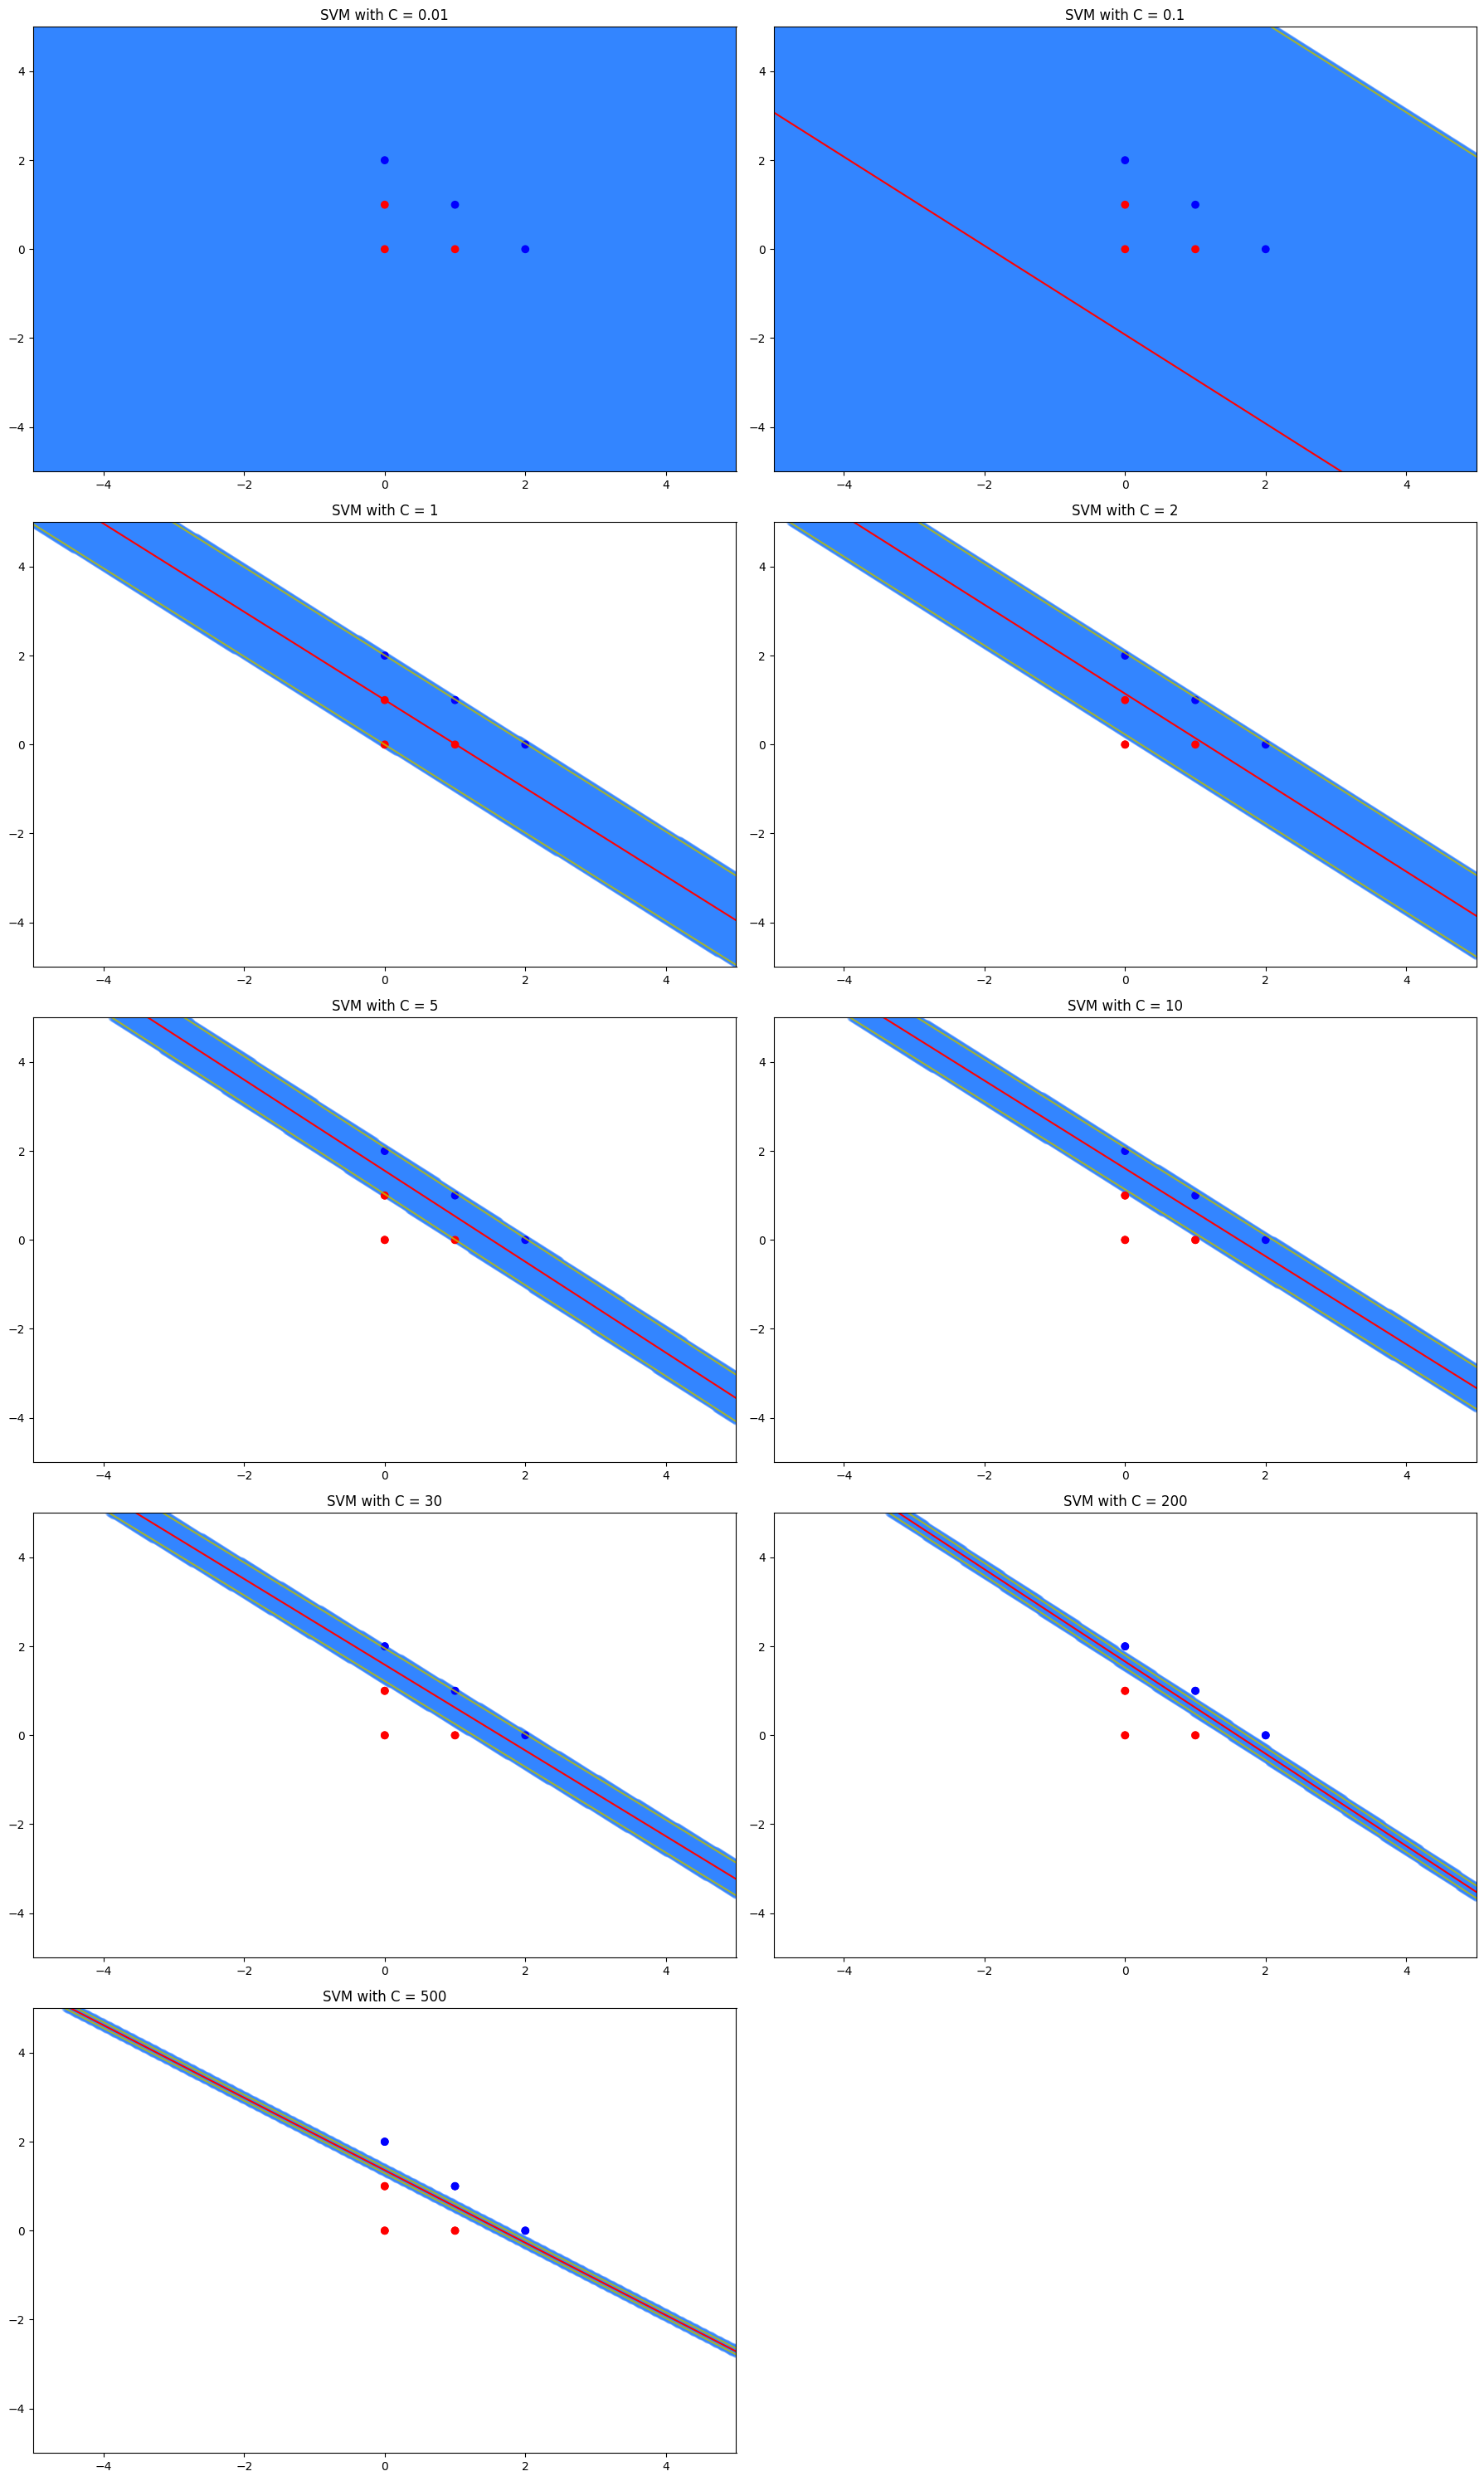

In [40]:
C = [0.01, 0.1, 1, 2, 5, 10, 30, 200, 500]
gamma = 0.9

plt.figure(figsize=(18, 30))
plt.rcParams['figure.facecolor'] = 'white'

ncols = 2
nrows = int(np.ceil(len(C) / ncols))  # Convert nrows to integer

for i, _C in enumerate(C):
    theta, b = train_svm(X, y, _C, gamma)
    plt.subplot(nrows, ncols, i + 1)
    plot_hyperplane(X, y, theta, b)
    plt.title(f'SVM with C = {_C}')

plt.tight_layout()
plt.show()

## SVM for non separable case

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

features, labels = datasets.make_circles(100,
                                         noise=0.05,
                                         random_state=17,
                                         factor=0.5)

colors = ['r' if _labels == 0 else 'b' for _labels in labels] # blue positive class and red negative class

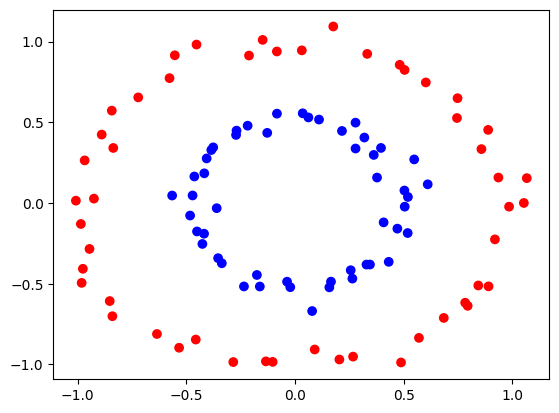

In [42]:
plt.scatter(features[:, 0], features[:, 1], c=colors) # data points plot
plt.show()

### SVM with RBF Kernel on make_circles

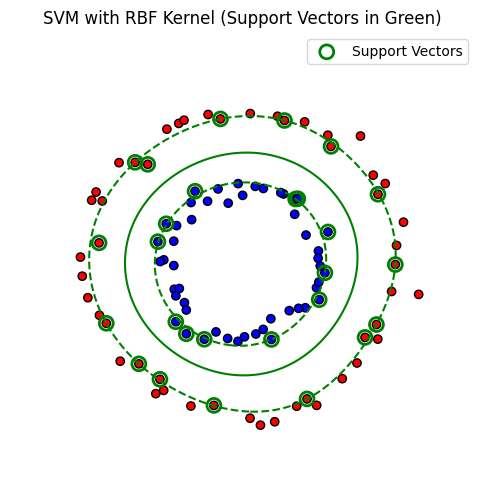

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

X, y = make_circles(n_samples=100, factor=0.5, noise=0.05) # synthetic non-linear data

clf = SVC(kernel='rbf', C=1.0) # SVM RBF Kernel
clf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500),
                     np.linspace(-1.5, 1.5, 500)) # mesh grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='green') # decision boundary and margin

colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k') # data points

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='green', linewidths=2, label='Support Vectors')

plt.title("SVM with RBF Kernel (Support Vectors in Green)")
plt.axis('equal')
plt.axis('off')
plt.legend()
plt.show()

### Function to Plot Decision Boundary

In [44]:
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # model evaluation with grid
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='#006400',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### SVM with Polynomial Kernel (Degree 2)

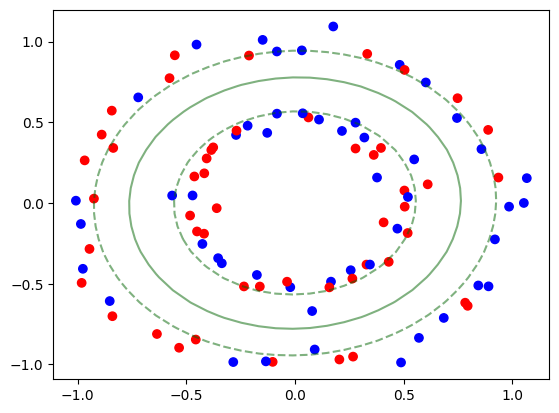

In [45]:
model = SVC(kernel='poly', degree=2)  # polynomial kernel of degree 2
model.fit(features, labels)

plt.scatter(features[:, 0], features[:, 1], c=colors)
plot_decision_boundary(model)
plt.show()

In [47]:
model.n_support_ # number of support vector

array([7, 6], dtype=int32)

In [48]:
model.support_ # indices of support vector

array([46, 66, 71, 79, 82, 97, 99, 20, 29, 31, 36, 40, 60], dtype=int32)

In [49]:
model.support_vectors_

array([[-0.92471076,  0.02713265],
       [-0.08328664,  0.93829021],
       [ 0.74515983,  0.52625083],
       [ 0.09073481, -0.90708293],
       [ 0.8576866 ,  0.3337843 ],
       [-0.83589622,  0.34089471],
       [-0.21146497,  0.91310693],
       [ 0.07895556, -0.6690099 ],
       [ 0.54836916,  0.26992425],
       [ 0.43123107, -0.36434417],
       [ 0.27856545,  0.49758226],
       [ 0.61055432,  0.11559977],
       [-0.56498744,  0.04626758]])

### SVM with Linear Kernel (Varying C Parameter)

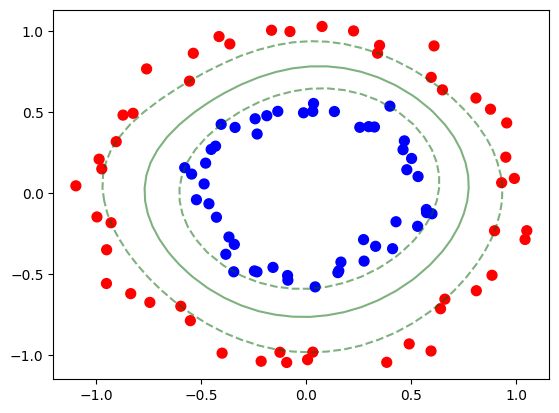

In [53]:
features_, labels_ = make_circles(n_samples=100, factor=0.5, noise=0.05) # synthetic non-linear data

# Define colors for each class for plotting
colors_ = ['red' if label == 0 else 'blue' for label in labels_]

# Train SVM model with cost parameter C=10
model_1 = SVC(C=10).fit(features_, labels_) # SVM model with the C parameter

plt.scatter(features_[:, 0], features_[:, 1], c=colors_, s=50)
plot_decision_boundary(model_1)
plt.show()

In [54]:
model_1.n_support_ # number of support vectors

array([10,  5], dtype=int32)

In [55]:
model_1.support_ # indices of support vectors

model_1.support_vectors_ # ndarray of support vectors

array([[ 0.92969657,  0.06436062],
       [-0.59616005, -0.69881196],
       [-0.90339006,  0.31809025],
       [ 0.33957025,  0.86472629],
       [-0.5548327 ,  0.69214405],
       [ 0.89585593, -0.23221474],
       [ 0.03170298, -0.9821684 ],
       [ 0.64818671,  0.63818672],
       [ 0.65969368, -0.65492115],
       [-0.92780574, -0.18294379],
       [ 0.59836594, -0.12742229],
       [-0.40427785,  0.4252932 ],
       [-0.57762373,  0.1571905 ],
       [ 0.39826349,  0.53747785],
       [-0.34443203, -0.48583077]])